In [1]:
import pandas as pd
import pyodbc

# Kết nối đến SQL Server
# Kết nối đến SQL Server với Windows Authentication
connection_string = (
    "DRIVER={SQL Server};"
    "SERVER=LAPTOP-IBQB3FPP\MSSQLSERVER01;"
    "DATABASE=DataWarehouse1;"
    "Trusted_Connection=yes;"  # Sử dụng Windows Authentication
)

# Tạo kết nối
conn = pyodbc.connect(connection_string)

# Truy vấn dữ liệu từ bảng Matches
query = """
SELECT 
    m.*, 
    t1.TeamName AS HomeTeamName, 
    t2.TeamName AS AwayTeamName
FROM Matches m
JOIN Teams t1 ON m.HomeTeamID = t1.TeamID
JOIN Teams t2 ON m.AwayTeamID = t2.TeamID
"""

# Đọc dữ liệu vào DataFrame
df_matches = pd.read_sql_query(query, conn)

# Đóng kết nối
conn.close()

<>:8: SyntaxWarning: invalid escape sequence '\M'
<>:8: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ACER USER\AppData\Local\Temp\ipykernel_17580\492757393.py:8: SyntaxWarning: invalid escape sequence '\M'
  "SERVER=LAPTOP-IBQB3FPP\MSSQLSERVER01;"
C:\Users\ACER USER\AppData\Local\Temp\ipykernel_17580\492757393.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_matches = pd.read_sql_query(query, conn)


In [2]:
df_matches

,HomeTeamID,AwayTeamID,Date,HomeScore,AwayScore,ShotsHome,ShotsAway,ShotsOnGoalHome,ShotsOnGoalAway,PassesHome,...,FoulsAway,YellowCardsHome,YellowCardsAway,PossessionTimeHome,PossessionTimeAway,RedCardsHome,RedCardsAway,Label,HomeTeamName,AwayTeamName
0,3,4,2019-08-11,4.0,0.0,11,18,5,7,449,...,13,3,4,0.46,0.54,0,0,1,Manchester United,Chelsea
1,5,7,2019-08-11,0.0,0.0,15,8,1,2,666,...,13,0,2,0.70,0.30,0,0,0,Leicester City,Wolverhampton Wanderers
2,13,8,2019-08-11,0.0,1.0,9,8,2,2,380,...,7,1,3,0.38,0.62,0,0,-1,Newcastle United,Arsenal
3,6,17,2019-08-10,3.0,1.0,31,7,7,4,587,...,9,1,0,0.69,0.31,0,0,1,Tottenham Hotspur,Aston Villa
4,18,9,2019-08-10,1.0,1.0,13,8,3,3,487,...,19,2,1,0.53,0.47,0,0,0,AFC Bournemouth,Sheffield United
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,14,17,2024-05-11,5.0,0.0,15,8,9,2,552,...,8,1,4,0.54,0.46,0,0,1,Crystal Palace,Aston Villa
1888,1,7,2024-05-11,2.0,0.0,36,4,14,3,621,...,10,1,1,0.67,0.33,0,1,1,Liverpool,Wolverhampton Wanderers
1889,26,22,2024-05-11,2.0,4.0,15,16,6,8,304,...,20,5,4,0.40,0.60,0,0,-1,Luton Town,Fulham
1890,2,16,2024-05-11,3.0,1.0,28,3,12,2,782,...,12,0,1,0.71,0.29,0,0,1,Manchester City,West Ham United


In [31]:
# xóa cột HomeTeamID, AwayTeamID, TeamID
df_matches.drop(columns=['HomeTeamID', 'AwayTeamID'], inplace=True)

# Đổi vị trí cột 'HomeTeamName' và 'AwayTeamName' lên đầu, cột 'HomeTeamName' sẽ đứng trước 'AwayTeamName'
columns = ['HomeTeamName', 'AwayTeamName'] + [col for col in df_matches.columns if col not in ['HomeTeamName', 'AwayTeamName']]

# Sắp xếp lại các cột theo thứ tự mới
df_matches = df_matches[columns]
df_matches

,HomeTeamName,AwayTeamName,Date,HomeScore,AwayScore,ShotsHome,ShotsAway,ShotsOnGoalHome,ShotsOnGoalAway,PassesHome,...,AccuratePassesAway,FoulsHome,FoulsAway,YellowCardsHome,YellowCardsAway,PossessionTimeHome,PossessionTimeAway,RedCardsHome,RedCardsAway,Label
0,Manchester United,Chelsea,2019-08-11,4.0,0.0,11,18,5,7,449,...,442,15,13,3,4,0.46,0.54,0,0,1
1,Leicester City,Wolverhampton Wanderers,2019-08-11,0.0,0.0,15,8,1,2,666,...,202,3,13,0,2,0.70,0.30,0,0,0
2,Newcastle United,Arsenal,2019-08-11,0.0,1.0,9,8,2,2,380,...,524,12,7,1,3,0.38,0.62,0,0,-1
3,Tottenham Hotspur,Aston Villa,2019-08-10,3.0,1.0,31,7,7,4,587,...,200,13,9,1,0,0.69,0.31,0,0,1
4,AFC Bournemouth,Sheffield United,2019-08-10,1.0,1.0,13,8,3,3,487,...,332,10,19,2,1,0.53,0.47,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,Crystal Palace,Aston Villa,2024-05-11,5.0,0.0,15,8,9,2,552,...,401,10,8,1,4,0.54,0.46,0,0,1
1888,Liverpool,Wolverhampton Wanderers,2024-05-11,2.0,0.0,36,4,14,3,621,...,231,14,10,1,1,0.67,0.33,0,1,1
1889,Luton Town,Fulham,2024-05-11,2.0,4.0,15,16,6,8,304,...,391,15,20,5,4,0.40,0.60,0,0,-1
1890,Manchester City,West Ham United,2024-05-11,3.0,1.0,28,3,12,2,782,...,246,3,12,0,1,0.71,0.29,0,0,1


# data mining

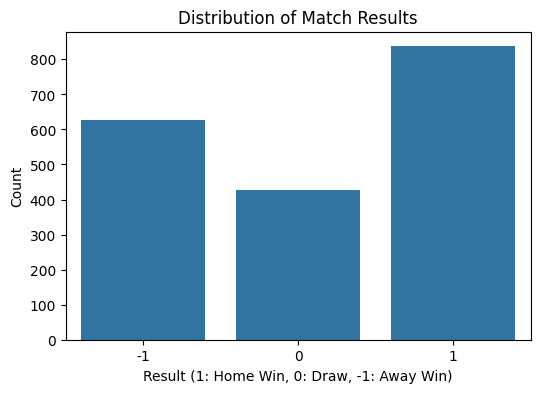

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Phân phối nhãn
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df_matches)
plt.title('Distribution of Match Results')
plt.xlabel('Result (1: Home Win, 0: Draw, -1: Away Win)')
plt.ylabel('Count')
plt.show()

ko chênh lệch nhiều do bóng đá không thể tăng cường dữ liệu

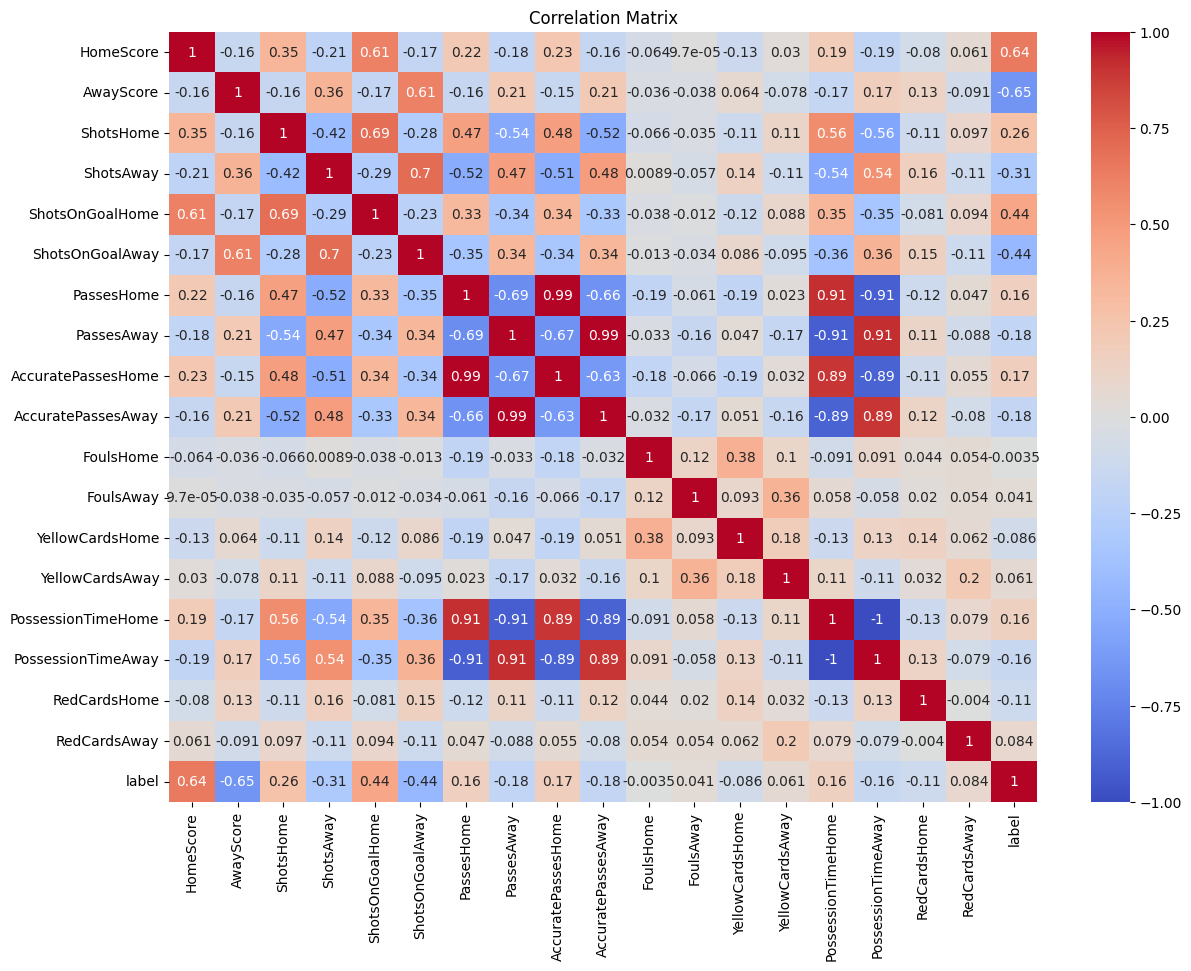

In [35]:
# Lọc các cột số
numeric_data = df_matches.select_dtypes(include=[float, int])

# Tính ma trận tương quan chỉ trên các cột số
plt.figure(figsize=(14,10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12396\2871377123.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=win_data, x='WinCount', y='TeamName', palette='Blues_d')


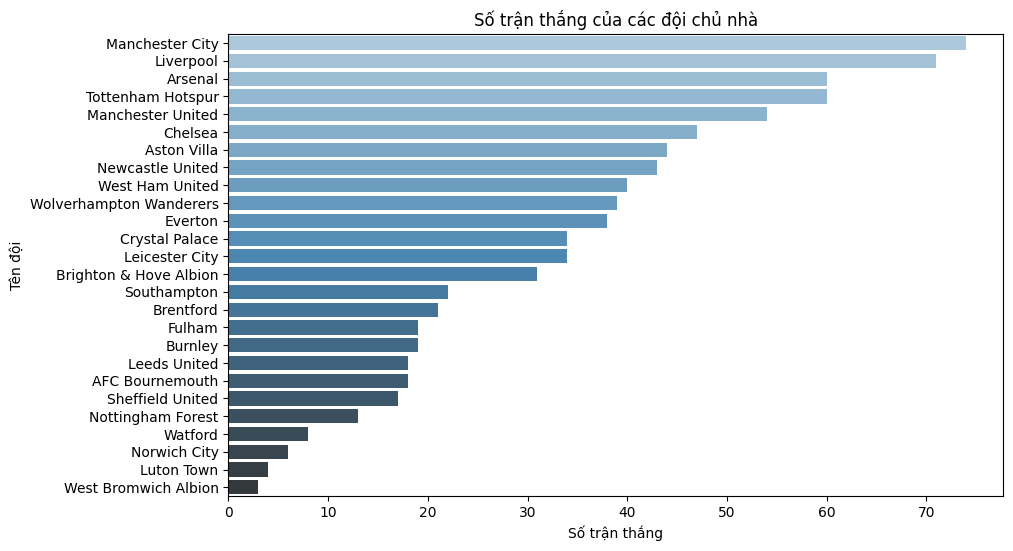

In [36]:
# Tính tổng số trận thắng của các đội
win_data = df_matches[df_matches['label'] == 1]['HomeTeamName'].value_counts().reset_index()
win_data.columns = ['TeamName', 'WinCount']

# Vẽ biểu đồ thanh
plt.figure(figsize=(10, 6))
sns.barplot(data=win_data, x='WinCount', y='TeamName', palette='Blues_d')
plt.title('Số trận thắng của các đội chủ nhà')
plt.xlabel('Số trận thắng')
plt.ylabel('Tên đội')
plt.show()


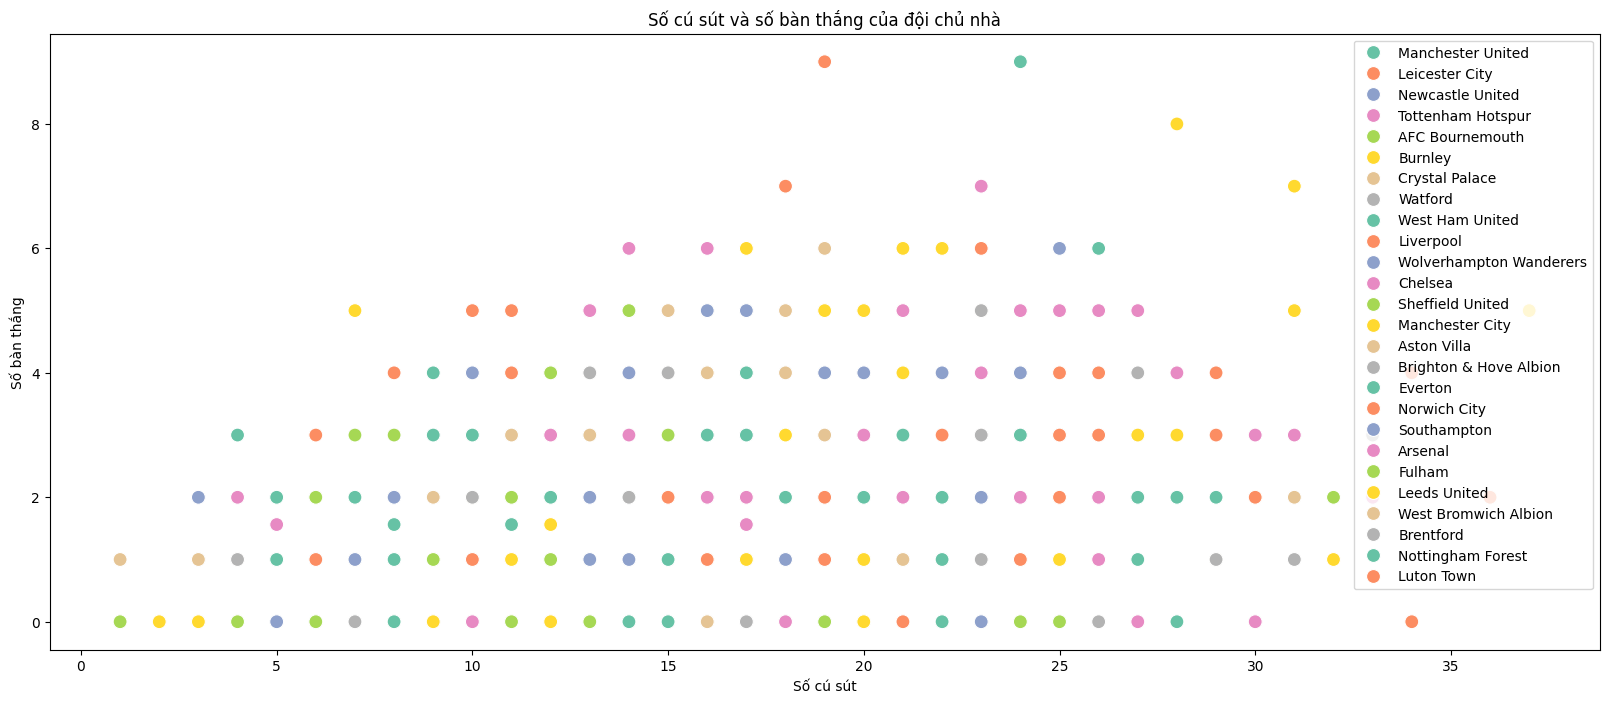

In [37]:
# Vẽ scatter plot giữa ShotsHome và HomeScore
plt.figure(figsize=(20, 8))
sns.scatterplot(data=df_matches, x='ShotsHome', y='HomeScore', hue='HomeTeamName', palette='Set2', s=100)
plt.title('Số cú sút và số bàn thắng của đội chủ nhà')
plt.xlabel('Số cú sút')
plt.ylabel('Số bàn thắng')
plt.legend(loc='upper right')
plt.show()


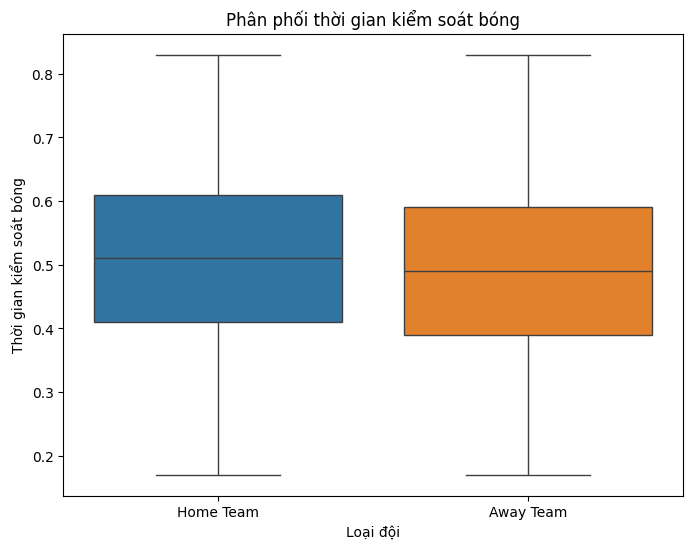

In [38]:
# Vẽ boxplot cho PossessionTimeHome và PossessionTimeAway
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_matches[['PossessionTimeHome', 'PossessionTimeAway']])
plt.title('Phân phối thời gian kiểm soát bóng')
plt.xlabel('Loại đội')
plt.ylabel('Thời gian kiểm soát bóng')
plt.xticks([0, 1], ['Home Team', 'Away Team'])
plt.show()


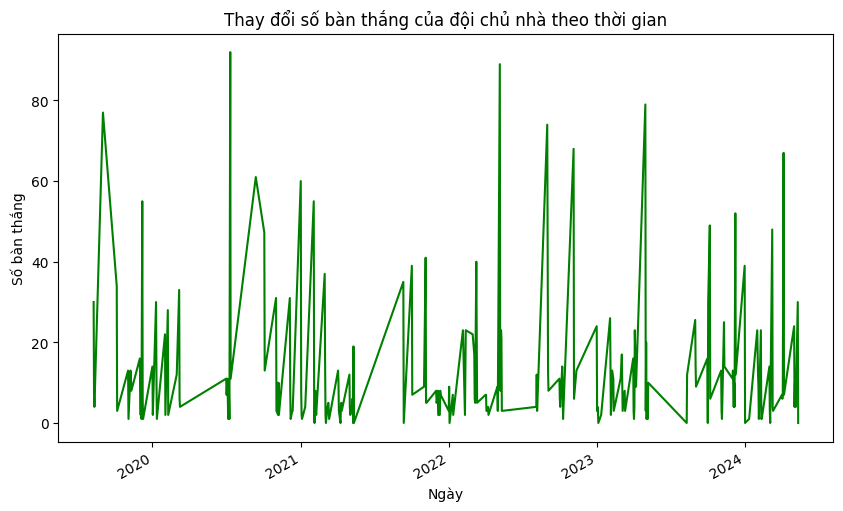

In [39]:
# Vẽ biểu đồ đường cho số bàn thắng của đội chủ nhà qua thời gian
df_matches['Date'] = pd.to_datetime(df_matches['Date'])
home_goals_by_date = df_matches.groupby('Date')['HomeScore'].sum()

plt.figure(figsize=(10, 6))
home_goals_by_date.plot(kind='line', color='green')
plt.title('Thay đổi số bàn thắng của đội chủ nhà theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Số bàn thắng')
plt.show()


# **mô hình RandomForestClassifier**

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pd.options.mode.chained_assignment = None  # Tắt cảnh báo

# Chọn các cột đặc trưng cho mô hình
features = [
    'home_team_encoded', 'away_team_encoded', 'ShotsHome', 'ShotsAway', 
    'ShotsOnGoalHome', 'ShotsOnGoalAway', 'PassesHome', 'PassesAway',
    'AccuratePassesHome', 'AccuratePassesAway', 'FoulsHome', 'FoulsAway',
    'YellowCardsHome', 'YellowCardsAway', 'PossessionTimeHome', 'PossessionTimeAway'
]

# 1. Encoding tên đội bóng
le_home = LabelEncoder()
le_away = LabelEncoder()

df_matches.loc[:, 'home_team_encoded'] = le_home.fit_transform(df_matches['HomeTeamName'])
df_matches.loc[:, 'away_team_encoded'] = le_away.fit_transform(df_matches['AwayTeamName'])

# 2. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = df_matches[features]
y = df_matches['Label']  # Giả sử cột label đã có sẵn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Huấn luyện mô hình Random Forest
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)

# 4. Dự đoán và đánh giá mô hình
y_pred = model_RF.predict(X_test)

# In ra thông tin về hiệu suất
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))

# In ra ma trận nhầm lẫn
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))

# Tính toán Accuracy (Độ chính xác)
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy:.2f}")


Báo cáo phân loại:
              precision    recall  f1-score   support

          -1       0.56      0.72      0.63       111
           0       0.43      0.10      0.17        87
           1       0.64      0.77      0.70       181

    accuracy                           0.60       379
   macro avg       0.55      0.53      0.50       379
weighted avg       0.57      0.60      0.56       379

Ma trận nhầm lẫn:
[[ 80   5  26]
 [ 27   9  51]
 [ 35   7 139]]
Độ chính xác của mô hình: 0.60


# **mô hình RandomForestClassifier sử dụng GridSearchCV**

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Chọn các cột đặc trưng cho mô hình
features = [
    'home_team_encoded', 'away_team_encoded', 'ShotsHome', 'ShotsAway', 
    'ShotsOnGoalHome', 'ShotsOnGoalAway', 'PassesHome', 'PassesAway',
    'AccuratePassesHome', 'AccuratePassesAway', 'FoulsHome', 'FoulsAway',
    'YellowCardsHome', 'YellowCardsAway', 'PossessionTimeHome', 'PossessionTimeAway'
]

# Tách dữ liệu thành các biến độc lập (X) và biến mục tiêu (y)
X = df_matches[features]  # Giả sử bạn đã xác định các đặc trưng (features)
y = df_matches['Label']   # Giả sử bạn có cột nhãn là 'label'

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định nghĩa mô hình RandomForestClassifier
rf = RandomForestClassifier()

# Thiết lập tham số cho GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Sửa 'auto' thành 'sqrt', 'log2' hoặc None
}

# Tìm kiếm tham số tốt nhất
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

# Dự đoán với mô hình tốt nhất
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Đánh giá mô hình
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))

print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình: {:.2f}".format(accuracy))


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Báo cáo phân loại:
              precision    recall  f1-score   support

          -1       0.62      0.79      0.70       111
           0       0.50      0.10      0.17        87
           1       0.67      0.82      0.74       181

    accuracy                           0.65       379
   macro avg       0.60      0.57      0.54       379
weighted avg       0.62      0.65      0.60       379

Ma trận nhầm lẫn:
[[ 88   2  21]
 [ 27   9  51]
 [ 26   7 148]]
Độ chính xác của mô hình: 0.65


In [26]:
# Lưu mô hình bằng pickle
import pickle

# Lưu mô hình
with open('model//best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

# lưu các đối tượng LabelEncoder le_home và le_away 2 file riêng
with open('model//le_home.pkl', 'wb') as file:
    pickle.dump(le_home, file)

with open('model//le_away.pkl', 'wb') as file:
    pickle.dump(le_away, file)

# Predict đội bóng

In [13]:
# Lưu mô hình bằng pickle
import pickle
# Load model đã train
best_rf = pickle.load(open('model//best_rf_model.pkl', 'rb'))
# Load các LabelEncoders đã sử dụng để mã hóa tên đội bóng
le_home = pickle.load(open('model//le_home.pkl', 'rb'))
le_away = pickle.load(open('model//le_away.pkl', 'rb'))


C:\Users\ACER USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\ACER USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\ACER USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning

In [14]:
# Chọn các cột đặc trưng cho mô hình
features = [
    'home_team_encoded', 'away_team_encoded', 'ShotsHome', 'ShotsAway', 
    'ShotsOnGoalHome', 'ShotsOnGoalAway', 'PassesHome', 'PassesAway',
    'AccuratePassesHome', 'AccuratePassesAway', 'FoulsHome', 'FoulsAway',
    'YellowCardsHome', 'YellowCardsAway', 'PossessionTimeHome', 'PossessionTimeAway'
]

In [15]:
import numpy as np
import pandas as pd

# Chuyển đổi các cột cần thiết sang kiểu số
for col in features[2:]:
    df_matches.loc[:, col] = pd.to_numeric(df_matches[col], errors='coerce')  # Sử dụng .loc

# Hàm dự đoán
def predict_match(home_team, away_team):
    try:
        # Kiểm tra xem tên đội bóng có trong dữ liệu không
        if home_team not in df_matches['HomeTeamName'].values and home_team not in df_matches['AwayTeamName'].values:
            return f"Lỗi: {home_team} không có trong dữ liệu."
        if away_team not in df_matches['HomeTeamName'].values and away_team not in df_matches['AwayTeamName'].values:
            return f"Lỗi: {away_team} không có trong dữ liệu."
        
        # Kiểm tra xem có trùng tên đội bóng không
        if home_team == away_team:
            return "Lỗi: Hai đội bóng không thể giống nhau."

        # Mã hóa tên đội bóng
        home_team_enc = le_home.transform([home_team])[0]
        away_team_enc = le_away.transform([away_team])[0]
    except ValueError as e:
        return f"Lỗi: {str(e)}. Vui lòng kiểm tra tên đội bóng."

    # Tìm kiếm các thống kê trung bình cho hai đội
    home_stats = df_matches[df_matches['HomeTeamName'] == home_team][features[2:]].mean()  # Trung bình các thông số của đội nhà
    away_stats = df_matches[df_matches['AwayTeamName'] == away_team][features[2:]].mean()  # Trung bình các thông số của đội khách

    # Nếu không tìm thấy thông tin thống kê, gán giá trị mặc định
    if home_stats.isnull().any() or away_stats.isnull().any():
        return "Không tìm thấy thông tin thống kê cho một trong hai đội."

    input_data = [[
        home_team_enc, away_team_enc, 
        home_stats['ShotsHome'], away_stats['ShotsAway'], 
        home_stats['ShotsOnGoalHome'], away_stats['ShotsOnGoalAway'],
        home_stats['PassesHome'], away_stats['PassesAway'],
        home_stats['AccuratePassesHome'], away_stats['AccuratePassesAway'],
        home_stats['FoulsHome'], away_stats['FoulsAway'],
        home_stats['YellowCardsHome'], away_stats['YellowCardsAway'],
        home_stats['PossessionTimeHome'], away_stats['PossessionTimeAway']
    ]]
    
    # Dự đoán kết quả
    # result = model_RF.predict(np.array(input_data))  # Chuyển đổi sang mảng NumPy
    result = best_rf.predict(np.array(input_data))  # Chuyển đổi sang mảng NumPy
    return result[0]  # Trả về kết quả

# Ví dụ sử dụng hàm predict_match
# home_team = 'Liverpool'
# away_team = 'Manchester City'

home_team = 'Manchester United'
away_team = 'Manchester City'

# home_team = 'Manchester United'
# away_team = 'Manchester United'

# home_team = 'Wolverhampton Wanderers'
# away_team = 'Everton'

result = predict_match(home_team, away_team)

if isinstance(result, str):
    print(result)  # In ra thông báo lỗi nếu có
else:
    if result == 1:
        print(f"{home_team} sẽ thắng {away_team}")
    elif result == 0:
        print(f"{home_team} và {away_team} hòa")
    else:
        print(f"{away_team} sẽ thắng {home_team}")


Manchester City sẽ thắng Manchester United


C:\Users\ACER USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
